In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data1=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
data1

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [3]:
# Until now it seems binary classification problem. Further confirmation needs to be done. 
# In which fraud_reported is the target Variable for Classification

In [4]:
# Exploratory Data Analysis

In [5]:
data1.shape

(1000, 40)

In [6]:
# checking columns in list form
data1.columns.tolist


<bound method IndexOpsMixin.tolist of Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')>

In [7]:
data1.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [8]:
# Checking Null Values
data1.isnull( ).sum( )

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [9]:
# Further checking datatype and size of data
data1.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [10]:
# Date needs be of datetime datatype instead of object
data1['policy_bind_date']=pd.to_datetime(data1.policy_bind_date, format='%d-%m-%Y')

In [11]:
# Setting Date as DataFrame index
data1.set_index('policy_bind_date', inplace=True)

In [12]:
data1.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
policy_bind_date,,,,,,,,,,,,,,,,,,,,,
2014-10-17,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
2006-06-27,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2000-09-06,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
1990-05-25,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
2014-06-06,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [13]:
# Checking the value counts(or number of unique values) of each column
for i in data1.columns:
        print(data1[i].value_counts( ))
        print('\n')

194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64


43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64


521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: policy_number, Length: 1000, dtype: int64


OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64


1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64


155

In [14]:
# Target data is imbalanced
# property_damage has 360 ? that needs to be replaced 
# collision_type has 178 ? that needs to be replaced
# police_report_available has 343 ? needs to be replaced
# incident_date is of dtype int which must be changed to datetime format
# capital_gains has more than 90% zeros so need to be dropped
# capital-loss has majority of zeros so need to be dropped
# umbrella_limit has also more than 80% zeros so need to be dropped 
# _c39 has majority nulls so needs to be dropped

In [15]:
data1.drop(columns=['capital-gains', 'capital-loss', 'umbrella_limit'], inplace=True)

In [16]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2014-10-17 to 1996-11-11
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   insured_zip                  1000 non-null   int64  
 8   insured_sex                  1000 non-null   object 
 9   insured_education_level      1000 non-null   object 
 10  insured_occupation           1000 non-null   object 
 11  insured_hobbies              1000 non-null   object 
 12  insured_relationship         1000 non-null   object 
 13  

In [17]:
# _c39 has lots of null values
data1.drop(columns=['_c39'], inplace=True)

In [18]:
# Replace ? with Nan values of the columns by mode as the features are of Object data type
columns_to_process = ['property_damage', 'collision_type', 'police_report_available']
for col in columns_to_process:
    data1[col] = data1[col].replace('?', np.nan)

In [19]:
data1.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
total_claim_amount               0
injury_claim        

In [20]:
# Now Null values needs to be replaced as all three aforementioned columns are of category type data
# so nan will be replaced via mode[0]
data1['property_damage']= data1['property_damage'].fillna(data1['property_damage'].mode( )[0])
data1['collision_type']= data1['collision_type'].fillna(data1['collision_type'].mode( )[0])
data1['police_report_available']= data1['police_report_available'].fillna(data1['police_report_available'].mode( )[0])

In [21]:
data1.isnull().sum().sum()

0

In [22]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2014-10-17 to 1996-11-11
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   insured_zip                  1000 non-null   int64  
 8   insured_sex                  1000 non-null   object 
 9   insured_education_level      1000 non-null   object 
 10  insured_occupation           1000 non-null   object 
 11  insured_hobbies              1000 non-null   object 
 12  insured_relationship         1000 non-null   object 
 13  

In [23]:
# Date needs be of datetime datatype instead of object
data1['incident_date']=pd.to_datetime(data1.incident_date, format='%d-%m-%Y')

In [31]:
data1.set_index('incident_date', inplace=True)

In [32]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2015-01-25 to 2015-02-26
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   insured_zip                  1000 non-null   int64  
 8   insured_sex                  1000 non-null   object 
 9   insured_education_level      1000 non-null   object 
 10  insured_occupation           1000 non-null   object 
 11  insured_hobbies              1000 non-null   object 
 12  insured_relationship         1000 non-null   object 
 13  

In [33]:
data1.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_zip,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
incident_date,,,,,,,,,,,,,,,,,,,,,
2015-01-25,328,48,521585,OH,250/500,1000,1406.91,466132,MALE,MD,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
2015-01-21,228,42,342868,IN,250/500,2000,1197.22,468176,MALE,MD,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2015-02-22,134,29,687698,OH,100/300,2000,1413.14,430632,FEMALE,PhD,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
2015-01-10,256,41,227811,IL,250/500,2000,1415.74,608117,FEMALE,PhD,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
2015-02-17,228,44,367455,IL,500/1000,1000,1583.91,610706,MALE,Associate,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [34]:
# Seprating Numerical and categorical columns

# Checking for categorical columns
categorical_col=[ ]
for i in data1.dtypes.index:
      if data1.dtypes[i] == 'object':
             categorical_col.append(i)
print('categorical columns :  ',  categorical_col)

categorical columns :   ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


In [35]:
# Checking for numerical columns

numerical_col=[ ]
for i in data1.dtypes.index:
      if data1.dtypes[i] != 'object':
             numerical_col.append(i)
print('numerical columns :  ',  numerical_col)

numerical columns :   ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'insured_zip', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']


In [36]:
data1.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,insured_zip,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,501214.488000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,71701.610941,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,430104.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,448404.500000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,466445.500000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,603251.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,620962.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [ ]:
# Number of counts for each column is same
# Outliers do exist in several columns like months_as_customer, policy_annual_premium, injury claim,property_claim, vehicle_claim
# further confimation will be done using skew function
# Data doesn't seem to be much skewed

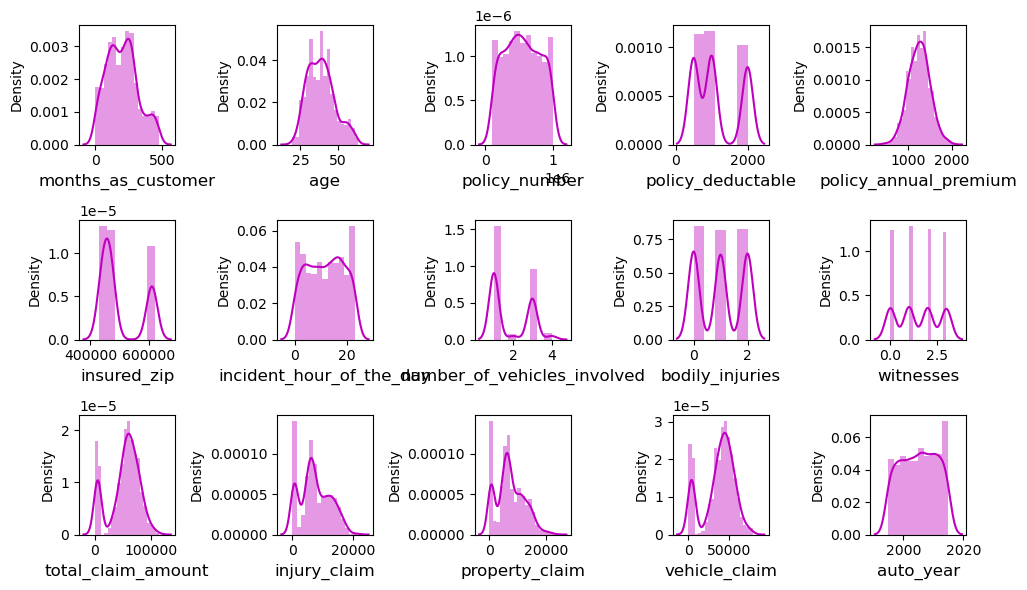

In [37]:
# Now let’s check how data is distributed in remaining columns

plt.figure(figsize= (10,6), facecolor='white')
plotnumber=1
for col in numerical_col:
    if plotnumber<=15:
        ax=plt.subplot(3,5,plotnumber)
        sns. distplot(data1[col], color='m')
        plt.xlabel(col, fontsize=12)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout( )

In [ ]:
# As expected most of the features are normally distribured
# Minor skewness do exists in injury_claim, property_claim, total_claim_amount, age, insured_zip

In [38]:
data1.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
insured_zip                    0.816554
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
dtype: float64

In [ ]:
# features such as vehicle_claim, total_claim_amount, insured_zip, number_of_vehicles_involved are beyond threshold of 
# -0.5 to 0.5, so it may contain outliers that could be treated using zscore, IQR or cbrt or combination of any of these.

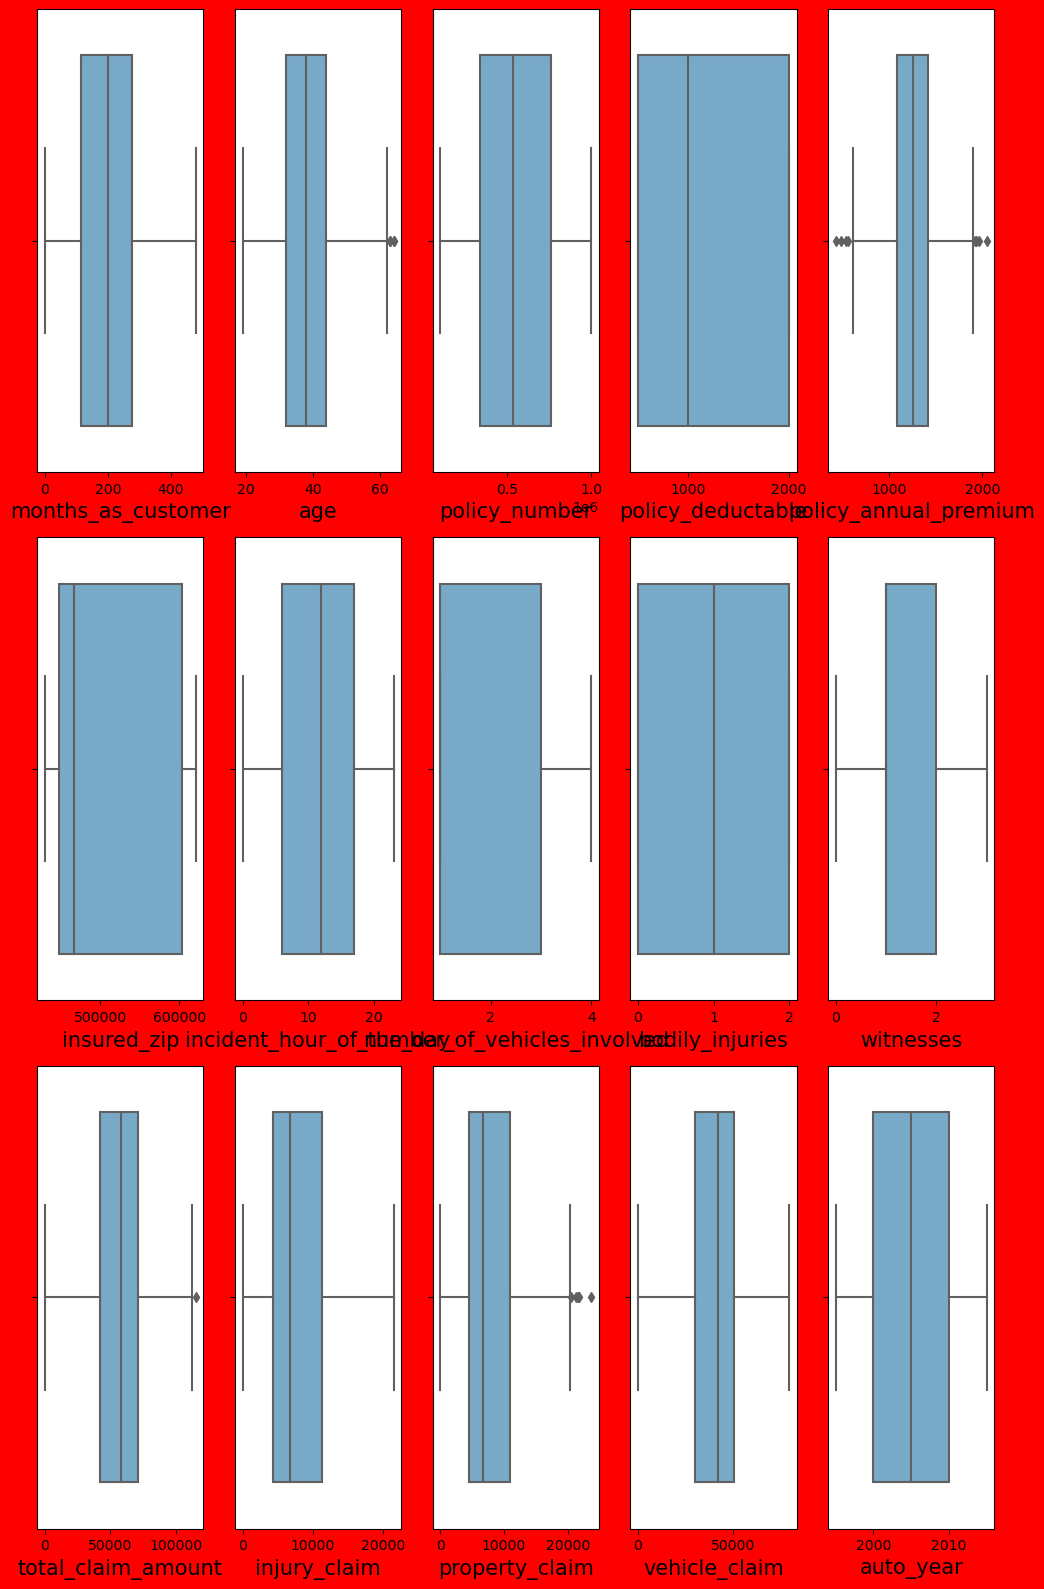

In [39]:
# To visualize outlier using boxplot
plt.figure(figsize=(10, 16), facecolor='red')
plotnumber = 1
for col in numerical_col:
    if plotnumber <= 15:
        ax = plt.subplot(3, 5, plotnumber)
        sns.boxplot(data1[col], palette='Blues')
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=0, fontsize=10)
        plotnumber += 1
plt.tight_layout()

In [41]:
#Applying zscore in light of skew and boxplot
from scipy.stats import zscore
out_features=data1[['total_claim_amount','property_claim','policy_annual_premium','age','insured_zip']] 
z=np.abs(zscore(out_features))
np.where(z>3)

(array([229, 248, 500, 763], dtype=int64), array([2, 2, 1, 2], dtype=int64))

In [45]:
z.iloc[229,2] # to confirm that value at row 229, and column 2 is greater than 3

3.1622662306712814

In [46]:
# Now removing the data above zscore and creating new DataFrame so that original df may preserve and could be used for IQR method
df1=data1[(z<3).all(axis=1)]

In [47]:
df1.skew()

months_as_customer             0.359605
age                            0.474526
policy_number                  0.033722
policy_deductable              0.473229
policy_annual_premium          0.032042
insured_zip                    0.825568
incident_hour_of_the_day      -0.039123
number_of_vehicles_involved    0.500364
bodily_injuries                0.011117
witnesses                      0.025758
total_claim_amount            -0.593473
injury_claim                   0.267970
property_claim                 0.357130
vehicle_claim                 -0.619755
auto_year                     -0.049276
dtype: float64

In [48]:
# calculate dataloss percentage between data1 and df1
print('data loss percentage:', ((data1.shape[0] - df1.shape[0]) / data1.shape[0]) * 100)

data loss percentage: 0.4


In [49]:
# It's a reasonalble data loss so zscore is a choice for skewness
# In vehicle_claim, number_of_vehicles_involved,total_claim_amount,insured_zip there still exist skewness
# so using cbrt method upon them could be a viable solution
df1[['vehicle_claim','number_of_vehicles_involved','total_claim_amount','insured_zip']]=np.cbrt(df1[['vehicle_claim','number_of_vehicles_involved','total_claim_amount','insured_zip']])

In [50]:
df1.skew()

months_as_customer             0.359605
age                            0.474526
policy_number                  0.033722
policy_deductable              0.473229
policy_annual_premium          0.032042
insured_zip                    0.803433
incident_hour_of_the_day      -0.039123
number_of_vehicles_involved    0.420291
bodily_injuries                0.011117
witnesses                      0.025758
total_claim_amount            -1.291803
injury_claim                   0.267970
property_claim                 0.357130
vehicle_claim                 -1.303721
auto_year                     -0.049276
dtype: float64

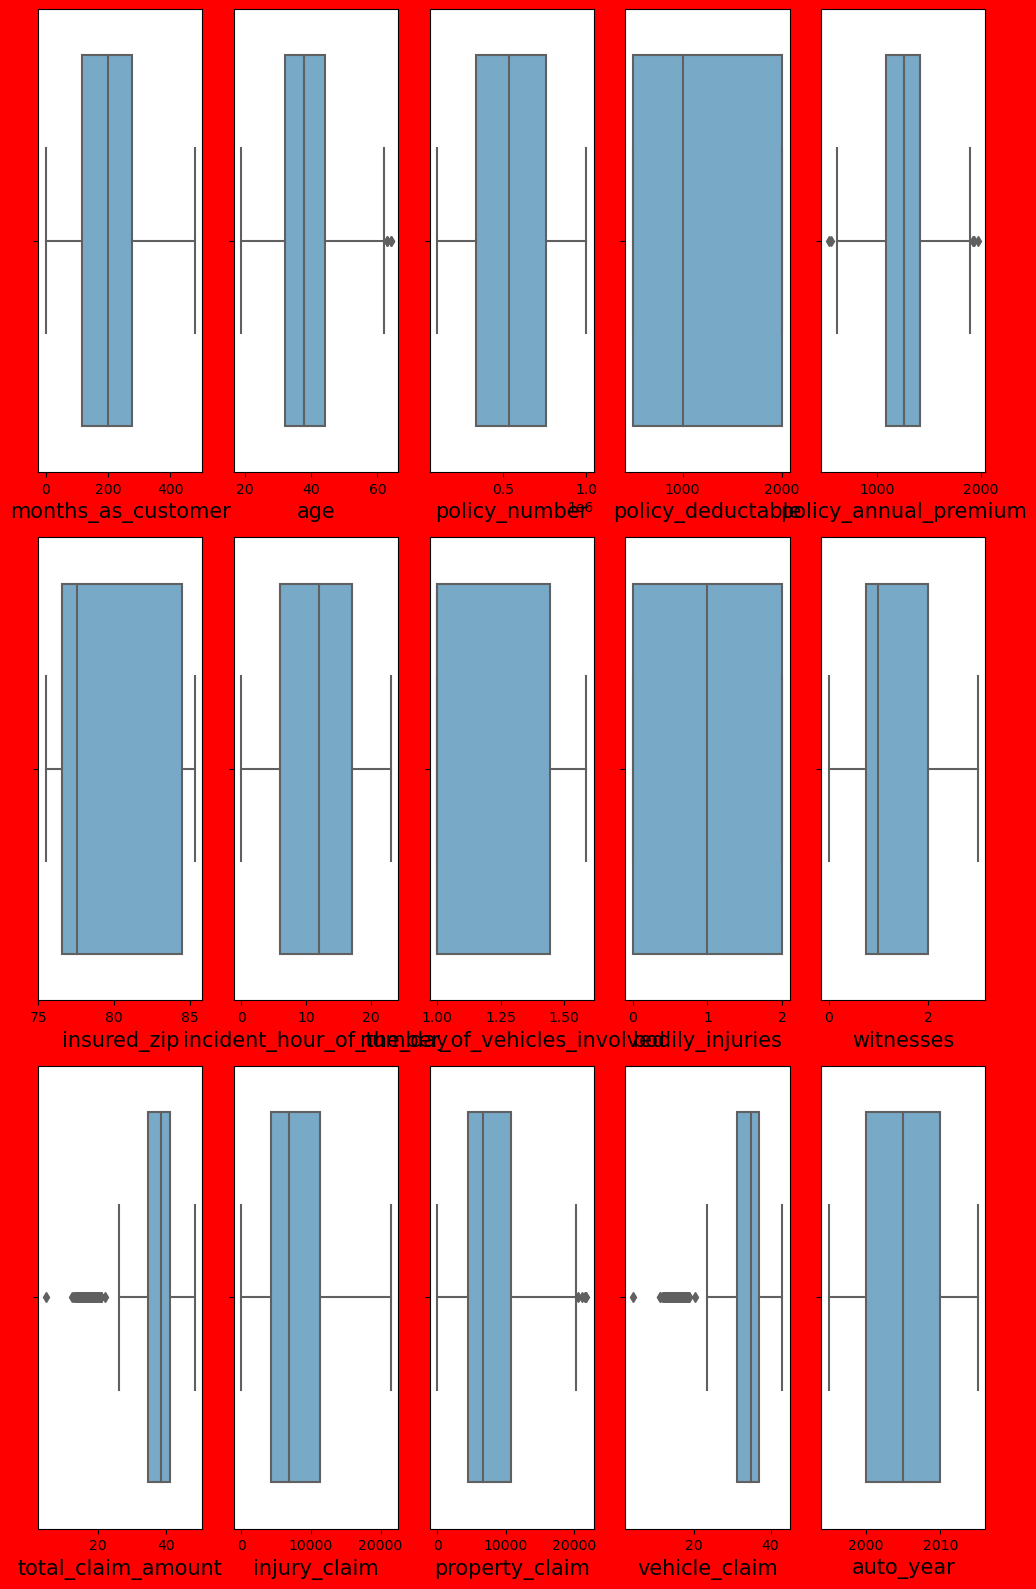

In [51]:
# Again checking the condition of outliers
plt.figure(figsize=(10, 16), facecolor='red')
plotnumber = 1
for col in numerical_col:
    if plotnumber <= 15:
        ax = plt.subplot(3, 5, plotnumber)
        sns.boxplot(df1[col], palette='Blues')
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=0, fontsize=10)
        plotnumber += 1
plt.tight_layout()

In [ ]:
# It seems by applying cbrt the outliers and skewness of features have further worsen
# so its adequate to apply zscore on these features

In [52]:
data1.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
insured_zip                    0.816554
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
dtype: float64

In [54]:
# Applying zscore in light of skew and boxplot
from scipy.stats import zscore
out_features=data1[['total_claim_amount','property_claim','policy_annual_premium','age','insured_zip']] 
z=np.abs(zscore(out_features))
np.where(z>3)

(array([229, 248, 500, 763], dtype=int64), array([2, 2, 1, 2], dtype=int64))

In [55]:
# Now removing the data above zscore and creating new DataFrame so that original df may preserve and could be used for IQR method
df2=data1[(z<3).all(axis=1)]

In [56]:
df2.skew()

months_as_customer             0.359605
age                            0.474526
policy_number                  0.033722
policy_deductable              0.473229
policy_annual_premium          0.032042
insured_zip                    0.825568
incident_hour_of_the_day      -0.039123
number_of_vehicles_involved    0.500364
bodily_injuries                0.011117
witnesses                      0.025758
total_claim_amount            -0.593473
injury_claim                   0.267970
property_claim                 0.357130
vehicle_claim                 -0.619755
auto_year                     -0.049276
dtype: float64

In [57]:
data1=df2

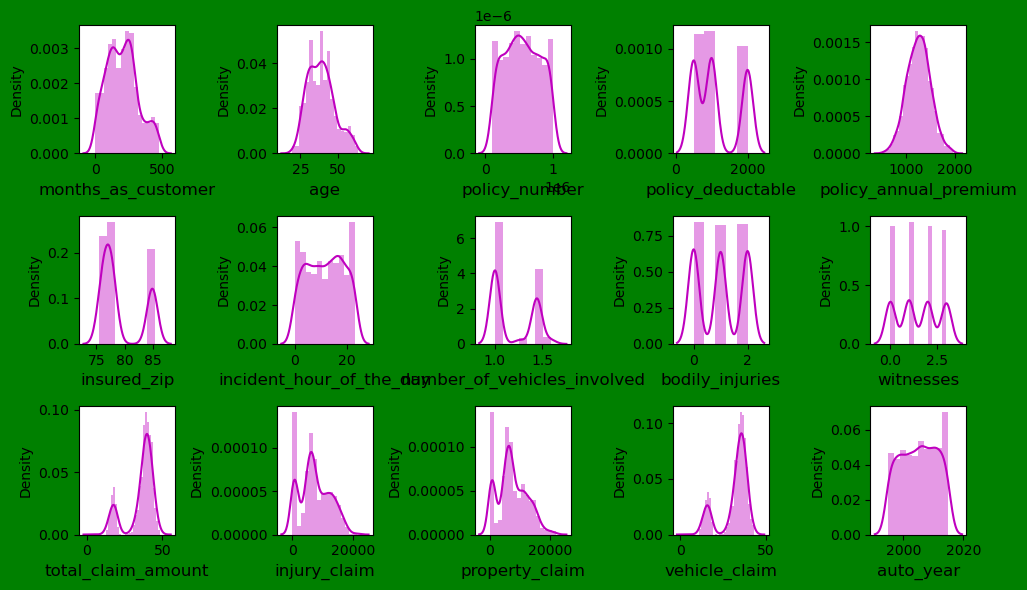

In [58]:
# Now let’s check how data is distributed in remaining columns

plt.figure(figsize= (10,6), facecolor='green')
plotnumber=1
for col in numerical_col:
    if plotnumber<=15:
        ax=plt.subplot(3,5,plotnumber)
        sns. distplot(df1[col], color='m')
        plt.xlabel(col, fontsize=12)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout( )

In [59]:
# Furthermore encoding of Object datatype columns is required
# Encoding categorical columns using OrdinalEncoder, it is applied on target as well

from sklearn.preprocessing import OrdinalEncoder

OE = OrdinalEncoder()

for i in data1.columns:
    if data1[i].dtype == 'object':
        data1[i] = OE.fit_transform(data1[i].values.reshape(-1, 1))

In [60]:
data1.head(20)

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_zip,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
incident_date,,,,,,,,,,,,,,,,,,,,,
2015-01-25,328,48,521585,2.0,1.0,1000,1406.91,466132,1.0,4.0,...,2,1.0,71610,6510,13020,52080,10.0,1.0,2004,1.0
2015-01-21,228,42,342868,1.0,1.0,2000,1197.22,468176,1.0,4.0,...,0,0.0,5070,780,780,3510,8.0,12.0,2007,1.0
2015-02-22,134,29,687698,2.0,0.0,2000,1413.14,430632,0.0,6.0,...,3,0.0,34650,7700,3850,23100,4.0,30.0,2007,0.0
2015-01-10,256,41,227811,0.0,1.0,2000,1415.74,608117,0.0,6.0,...,2,0.0,63400,6340,6340,50720,3.0,34.0,2014,1.0
2015-02-17,228,44,367455,0.0,2.0,1000,1583.91,610706,1.0,0.0,...,1,0.0,6500,1300,650,4550,0.0,31.0,2009,0.0
2015-01-02,256,39,104594,2.0,1.0,1000,1351.10,478456,0.0,6.0,...,2,0.0,64100,6410,6410,51280,10.0,3.0,2003,1.0
2015-01-13,137,34,413978,1.0,1.0,1000,1333.35,441716,1.0,6.0,...,0,0.0,78650,21450,7150,50050,9.0,29.0,2012,0.0
2015-02-27,165,37,429027,0.0,0.0,1000,1137.03,603195,1.0,0.0,...,2,1.0,51590,9380,9380,32830,1.0,5.0,2015,0.0
2015-01-30,27,33,485665,0.0,0.0,500,1442.99,601734,0.0,6.0,...,1,1.0,27700,2770,2770,22160,12.0,9.0,2012,0.0


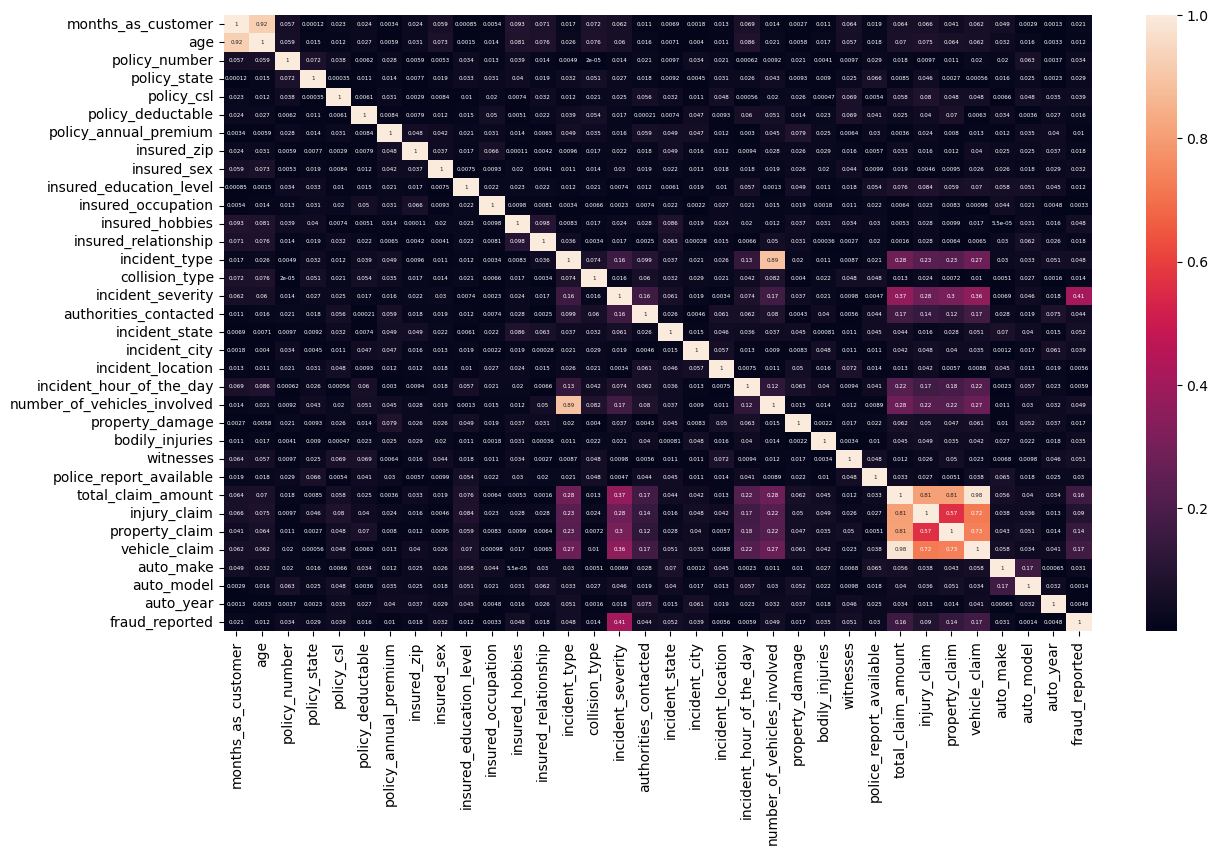

In [65]:
# Checking the correlation 
data1_corr = data1.corr().abs()  # abs means all positive values, this will get the coefficient of one variable vs all other variables (Relationship)

plt.figure(figsize=(14, 8))
sns.heatmap(data1_corr, annot=True, annot_kws={'size': 4})  # annot and annot_size(coeff font size) are optional annot=true will plot correlation_coefficients in the Heatmap
plt.show()

In [ ]:
# There exists total_claim_amount, injury_claim, property_claim that needs to be tackled via VIF
# VIF applies on features only so it is mandatory to seprate features and target

In [66]:
X=data1.drop('fraud_reported', axis=1)
Y=data1['fraud_reported']

In [67]:
# Scaling methods are applied only on independent variables, it is used to avoid biasdness or making units related to scale so that model treat all samples equally ( mean=0 std=1 for standard scaler, for min,max scaling the range is between 0 to 1 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler( )
X=pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [68]:
# Now to treat multicollinearity issue we are applying variance inflation factor (VIF) in each scaled columns , it always applies on independent variables, so no target variable

from statsmodels.stats.outliers_influence import variance_inflation_factor
# To make a dataframe
vif=pd.DataFrame( )
vif['VIF Values']= [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['Features']=X.columns

In [69]:
vif

,VIF Values,Features
0,6.814773,months_as_customer
1,6.835064,age
2,1.026138,policy_number
3,1.029695,policy_state
4,1.030634,policy_csl
5,1.035871,policy_deductable
6,1.036584,policy_annual_premium
7,1.026557,insured_zip
8,1.026303,insured_sex
9,1.038077,insured_education_level


In [ ]:
# Property claim is least contributing towards target so it can be dropped

In [70]:
# Drop columns one by one having VIF value greater than 10
X.drop('property_claim', axis=1, inplace=True)

In [71]:
vif=pd.DataFrame( )
vif['VIF Values']= [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['Features']=X.columns
vif

,VIF Values,Features
0,6.814773,months_as_customer
1,6.835064,age
2,1.026138,policy_number
3,1.029695,policy_state
4,1.030634,policy_csl
5,1.035871,policy_deductable
6,1.036584,policy_annual_premium
7,1.026557,insured_zip
8,1.026303,insured_sex
9,1.038077,insured_education_level


In [74]:
# Now dropping total_claim_amount because it exceeds a lot from threshold value of 10
# Drop columns one by one having VIF value greater than 10
X.drop('total_claim_amount', axis=1, inplace=True)

In [75]:
vif=pd.DataFrame( )
vif['VIF Values']= [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['Features']=X.columns
vif

,VIF Values,Features
0,6.766874,months_as_customer
1,6.789856,age
2,1.026111,policy_number
3,1.029519,policy_state
4,1.029968,policy_csl
5,1.028183,policy_deductable
6,1.035959,policy_annual_premium
7,1.026073,insured_zip
8,1.026256,insured_sex
9,1.038005,insured_education_level


In [ ]:
# Multicollinearity issues are well addressed

In [76]:
Y.value_counts()

0.0    750
1.0    246
Name: fraud_reported, dtype: int64

In [78]:
# Balancing the target samples
!pip install imblearn

In [79]:
from imblearn.over_sampling import SMOTE
SM=SMOTE(random_state=42 )

In [80]:
X1,Y1=SM.fit_resample(X,Y)

In [81]:
Y1.value_counts()

1.0    750
0.0    750
Name: fraud_reported, dtype: int64

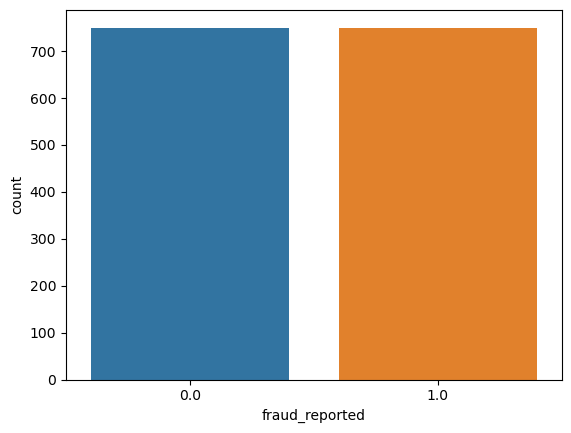

In [83]:
ax= sns.countplot(x=Y1,data=data1)

In [ ]:
# Hence target data is well balanced

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [85]:
X_train, X_test, Y_train,Y_test=train_test_split(X1,Y1,test_size=0.3, random_state=41)

In [86]:
def metric_score(clf, X_train, X_test, Y_train, Y_test, train=True):
    if train:
        Y_pred = clf.predict(X_train)
        print("\n==============train Results==============")
        print(f"Accuracy Score: {accuracy_score(Y_train, Y_pred) * 100:.2f}%")

    elif not train:
        Y_pred = clf.predict(X_test)
        print("\n==============test Results==============\n")
        print(f"Accuracy Score: {accuracy_score(Y_test, Y_pred) * 100:.2f}%")
        print("\n\nTest Classification Report\n", classification_report(Y_test, Y_pred, digits=2))

In [87]:
ETC=ExtraTreesClassifier()

In [88]:
ETC.fit(X_train,Y_train)

ExtraTreesClassifier()

In [89]:
metric_score(ETC, X_train,X_test,Y_train,Y_test, train=True)
metric_score(ETC, X_train,X_test,Y_train,Y_test, train=False)


==============train Results==============
Accuracy Score: 100.00%

==============test Results==============

Accuracy Score: 92.89%


Test Classification Report
               precision    recall  f1-score   support

         0.0       0.93      0.94      0.93       232
         1.0       0.93      0.92      0.93       218

    accuracy                           0.93       450
   macro avg       0.93      0.93      0.93       450
weighted avg       0.93      0.93      0.93       450



In [90]:
RFC=RandomForestClassifier()

In [91]:
RFC.fit(X_train,Y_train)

RandomForestClassifier()

In [92]:
metric_score(RFC, X_train,X_test,Y_train,Y_test, train=True)
metric_score(RFC, X_train,X_test,Y_train,Y_test, train=False)


==============train Results==============
Accuracy Score: 100.00%

==============test Results==============

Accuracy Score: 92.00%


Test Classification Report
               precision    recall  f1-score   support

         0.0       0.91      0.94      0.92       232
         1.0       0.93      0.90      0.92       218

    accuracy                           0.92       450
   macro avg       0.92      0.92      0.92       450
weighted avg       0.92      0.92      0.92       450



In [93]:
LR=LogisticRegression()

In [94]:
LR.fit(X_train,Y_train)

LogisticRegression()

In [95]:
metric_score(LR, X_train,X_test,Y_train,Y_test, train=True)
metric_score(LR, X_train,X_test,Y_train,Y_test, train=False)


==============train Results==============
Accuracy Score: 74.67%

==============test Results==============

Accuracy Score: 76.44%


Test Classification Report
               precision    recall  f1-score   support

         0.0       0.76      0.79      0.78       232
         1.0       0.77      0.73      0.75       218

    accuracy                           0.76       450
   macro avg       0.76      0.76      0.76       450
weighted avg       0.76      0.76      0.76       450



In [96]:
SV=SVC()

In [97]:
SV.fit(X_train,Y_train)

SVC()

In [98]:
metric_score(SV, X_train,X_test,Y_train,Y_test, train=True)
metric_score(SV, X_train,X_test,Y_train,Y_test, train=False)


==============train Results==============
Accuracy Score: 95.81%

==============test Results==============

Accuracy Score: 86.22%


Test Classification Report
               precision    recall  f1-score   support

         0.0       0.87      0.86      0.87       232
         1.0       0.85      0.87      0.86       218

    accuracy                           0.86       450
   macro avg       0.86      0.86      0.86       450
weighted avg       0.86      0.86      0.86       450



In [99]:
GBC=GradientBoostingClassifier()

In [100]:
GBC.fit(X_train,Y_train)

GradientBoostingClassifier()

In [101]:
metric_score(GBC, X_train,X_test,Y_train,Y_test, train=True)
metric_score(GBC, X_train,X_test,Y_train,Y_test, train=False)


==============train Results==============
Accuracy Score: 96.57%

==============test Results==============

Accuracy Score: 92.67%


Test Classification Report
               precision    recall  f1-score   support

         0.0       0.93      0.92      0.93       232
         1.0       0.92      0.93      0.92       218

    accuracy                           0.93       450
   macro avg       0.93      0.93      0.93       450
weighted avg       0.93      0.93      0.93       450



In [102]:
ABC=AdaBoostClassifier()

In [103]:
ABC.fit(X_train,Y_train)

AdaBoostClassifier()

In [104]:
metric_score(ABC, X_train,X_test,Y_train,Y_test, train=True)
metric_score(ABC, X_train,X_test,Y_train,Y_test, train=False)


==============train Results==============
Accuracy Score: 88.57%

==============test Results==============

Accuracy Score: 88.00%


Test Classification Report
               precision    recall  f1-score   support

         0.0       0.87      0.90      0.89       232
         1.0       0.89      0.86      0.87       218

    accuracy                           0.88       450
   macro avg       0.88      0.88      0.88       450
weighted avg       0.88      0.88      0.88       450



In [105]:
BC=BaggingClassifier()

In [106]:
BC.fit(X_train,Y_train)

BaggingClassifier()

In [107]:
metric_score(BC, X_train,X_test,Y_train,Y_test, train=True)
metric_score(BC, X_train,X_test,Y_train,Y_test, train=False)


==============train Results==============
Accuracy Score: 98.95%

==============test Results==============

Accuracy Score: 88.00%


Test Classification Report
               precision    recall  f1-score   support

         0.0       0.85      0.94      0.89       232
         1.0       0.92      0.82      0.87       218

    accuracy                           0.88       450
   macro avg       0.89      0.88      0.88       450
weighted avg       0.88      0.88      0.88       450



In [108]:
# Apparently the highest test accuracy is of ExtraTreesClassifier, GradientBoostingClassifier and RandomForestClassifier
# However to verify that it is not the result of overfitting we need to find the cross validation score
# # Algorithm with least difference (accuracy - cross_val_score) will be selected for further hyperparameter tuning
score= cross_val_score(ETC,X1,Y1)
print(score)
print(score.mean( )*100)

[0.87666667 0.87       0.93333333 0.95       0.95333333]
91.66666666666666


In [109]:
print(92.89-91.66)

1.230000000000004


In [110]:
# For RFC
score= cross_val_score(RFC,X1,Y1)
print(score)
print(score.mean( )*100)

[0.76333333 0.85333333 0.92333333 0.94       0.94      ]
88.4


In [111]:
print(92-88.4)

3.5999999999999943


In [112]:
# For LR 
score= cross_val_score(LR,X1,Y1)
print(score)
print(score.mean( )*100)

[0.71333333 0.73       0.74       0.75333333 0.74333333]
73.6


In [113]:
print(76.44-73.6)

2.8400000000000034


In [114]:
# For SV 
score= cross_val_score(SV,X1,Y1)
print(score)
print(score.mean( )*100)

[0.80666667 0.82       0.86       0.90666667 0.92333333]
86.33333333333333


In [115]:
print(86.22-86.33)

-0.10999999999999943


In [116]:
# For GBC
score= cross_val_score(GBC,X1,Y1)
print(score)
print(score.mean( )*100)

[0.77333333 0.84666667 0.89666667 0.94       0.93      ]
87.73333333333333


In [117]:
print(92.67-87.733)

4.936999999999998


In [118]:
# For ABC
score= cross_val_score(ABC,X1,Y1)
print(score)
print(score.mean( )*100)

[0.67       0.8        0.90333333 0.92       0.91333333]
84.13333333333334


In [119]:
print(88-84.13)

3.8700000000000045


In [120]:
# For BC
score= cross_val_score(BC,X1,Y1)
print(score)
print(score.mean( )*100)

[0.79       0.85333333 0.89       0.90333333 0.91333333]
87.00000000000001


In [121]:
print(88-87)

1


In [ ]:
# From above results it is concluded that SVC is the best model for onward HyperParameter Tuning because of least 
# difference

In [122]:
from sklearn.model_selection import GridSearchCV

In [123]:
param_grid = {
    'C': [0.1, 1, 10, 100],            
    'kernel': ['linear', 'rbf', 'poly'], 
    'gamma': ['scale', 'auto'],        
    'degree': [2, 3, 4]                
}

In [124]:
grid_search=GridSearchCV(estimator=SV, param_grid=param_grid, cv=5, scoring='accuracy')

In [125]:
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [126]:
grid_search.best_params_

{'C': 10, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}

In [130]:
BestModel = SVC(C=10,gamma='auto',kernel='rbf')  

In [131]:
BestModel.fit(X_train,Y_train)

SVC(C=10, gamma='auto')

In [132]:
pred=BestModel.predict(X_test)

In [133]:
acc= accuracy_score(Y_test,pred)
print(acc*100)

88.88888888888889


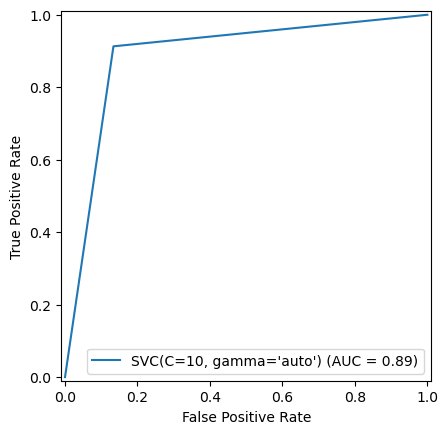

In [134]:
# Plotting ROC_AUC curve and value respectively
from sklearn import metrics
fpr, tpr, thresholds=metrics.roc_curve(Y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=BestModel)
display.plot( )

In [135]:
# Saving the model using.pkl (pickle format)
import  joblib
joblib.dump(BestModel,'InsuranceClaimFraud.pkl')

['InsuranceClaimFraud.pkl']

In [136]:
#Predicting using saved model
#let’s load the model
load=joblib.load('InsuranceClaimFraud.pkl')
prediction=BestModel.predict(X_test)
prediction

array([1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 0., 1., 0.

In [137]:
# For Better Visualization
b=np.array(Y_test)
df=pd.DataFrame( )
df['predicted']=prediction
df['Original']=b
print(df)

     predicted  Original
0          1.0       1.0
1          1.0       1.0
2          1.0       1.0
3          0.0       0.0
4          1.0       1.0
..         ...       ...
445        1.0       1.0
446        0.0       0.0
447        1.0       1.0
448        0.0       0.0
449        0.0       0.0

[450 rows x 2 columns]


In [138]:
Comparison=pd.DataFrame([load.predict(X_test)[:],Y_test[:]], index=['Predicted','Original'])
Comparison

,0,1,2,3,4,5,6,7,8,9,...,440,441,442,443,444,445,446,447,448,449
Predicted,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
Original,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [139]:
Comparison.replace({1: 'YES', 0: 'No'}, inplace=True)
# Modified DataFrame
print(Comparison)

           0    1    2   3    4   5    6    7    8   9    ... 440  441 442  \
Predicted  YES  YES  YES  No  YES  No  YES  YES  YES  No  ...  No  YES  No   
Original   YES  YES  YES  No  YES  No  YES  YES  YES  No  ...  No  YES  No   

           443 444  445 446  447 448 449  
Predicted  YES  No  YES  No  YES  No  No  
Original   YES  No  YES  No  YES  No  No  

[2 rows x 450 columns]


In [140]:
correct_predictions = (Comparison.loc['Predicted'] == Comparison.loc['Original']).sum()
total_predictions = len(Comparison.loc['Predicted'])
percentage_correct = (correct_predictions / total_predictions) * 100
print(f"Percentage of correct predictions: {percentage_correct:.2f}%")

Percentage of correct predictions: 88.89%
